# **MACHINE LEARNING PROJECT TEMPLATE**

# 1 - DEFINE THE PROBLEM
The goal of this project is to predict the CO₂ emissions (in grams/km) of vehicles based on various engine and fuel consumption features. Using the FuelConsumptionCo2.csv dataset, we aim to develop a linear regression model that learns from historical data and can accurately estimate the CO2EMISSIONS of a car given its technical specifications such as: Model, Vehicle class, Engine size,cylinder.


# 2 - IMPORT REQUIRED LIBRARIES

Import other necessary libraries/packages based on the problem

## 2.1 - Base Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 - ML/DL Libraries

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 3 - LOAD THE DATA
Load the dataset from a CSV, TXT, DB or online source, etc.

In [4]:


# URL of the dataset
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# Load the dataset directly from the URL
df = pd.read_csv(url)

# Display the first few rows to confirm it's loaded
print(df.head())


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

# 4 - EDA (Exploratory Data Analysis) of the DATA

In [5]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## 4.1 - Basic Overview

In [6]:

df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## 4.2 - Check for Missing Values

In [10]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## 4.3 - Analyze Data Types

In [11]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

# 5 - VISUALIZE THE DATA

## 5.1 - UNIVARIATE ANALYSIS

### Example: Distribution of a numerical variable using seaborn and matplotlib  
Replace 'feature_name' with the column you want to analyze

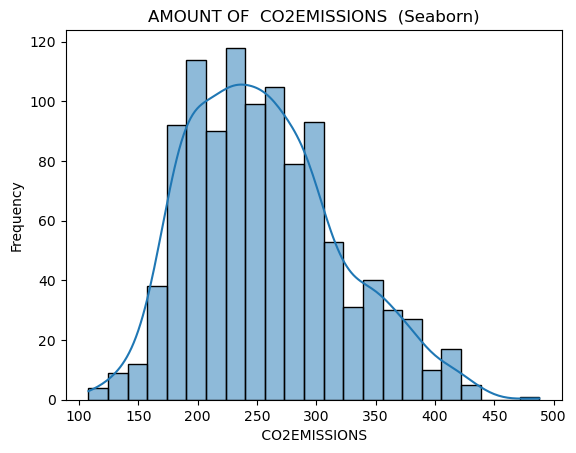

In [14]:
# Seaborn histogram
sns.histplot(df['CO2EMISSIONS'], kde=True)
plt.title("AMOUNT OF  CO2EMISSIONS  (Seaborn)")
plt.xlabel(" CO2EMISSIONS ")
plt.ylabel("Frequency")
plt.show()

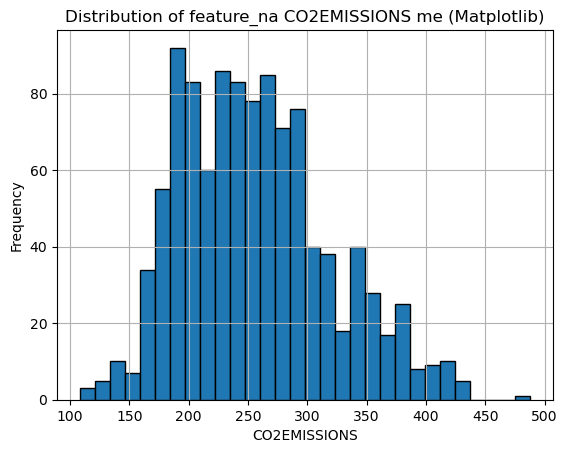

In [16]:
# Matplotlib histogram
plt.hist(df['CO2EMISSIONS'], bins=30, edgecolor='black')
plt.title("Distribution of feature_na CO2EMISSIONS me (Matplotlib)")
plt.xlabel("CO2EMISSIONS")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## 5.2 - BIVARIATE / MULTIVARIATE ANALYSIS

### Example: Scatter plot between two numerical variables

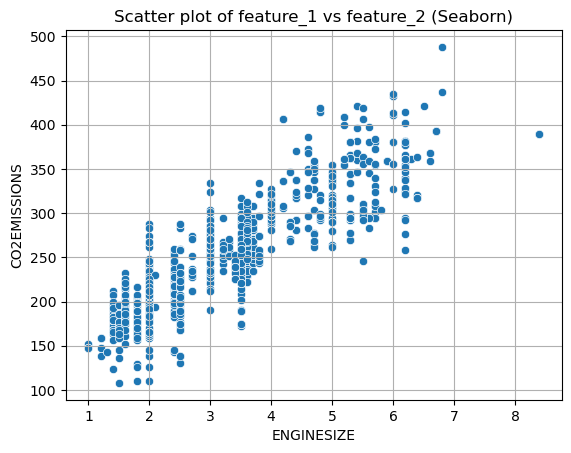

In [76]:
# Seaborn scatter plot
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title("Scatter plot of feature_1 vs feature_2 (Seaborn)")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.grid(True)
plt.show()

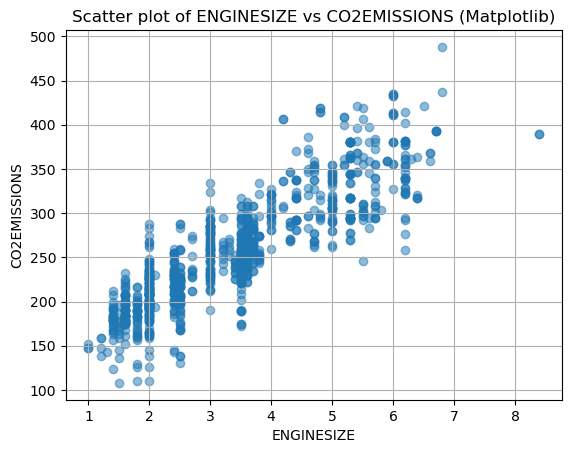

In [77]:
# Matplotlib scatter plot
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], alpha=0.5)
plt.title("Scatter plot of ENGINESIZE vs CO2EMISSIONS (Matplotlib)")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.grid(True)
plt.show()

### Example: Correlation heatmap (Seaborn only, but with Matplotlib styling)

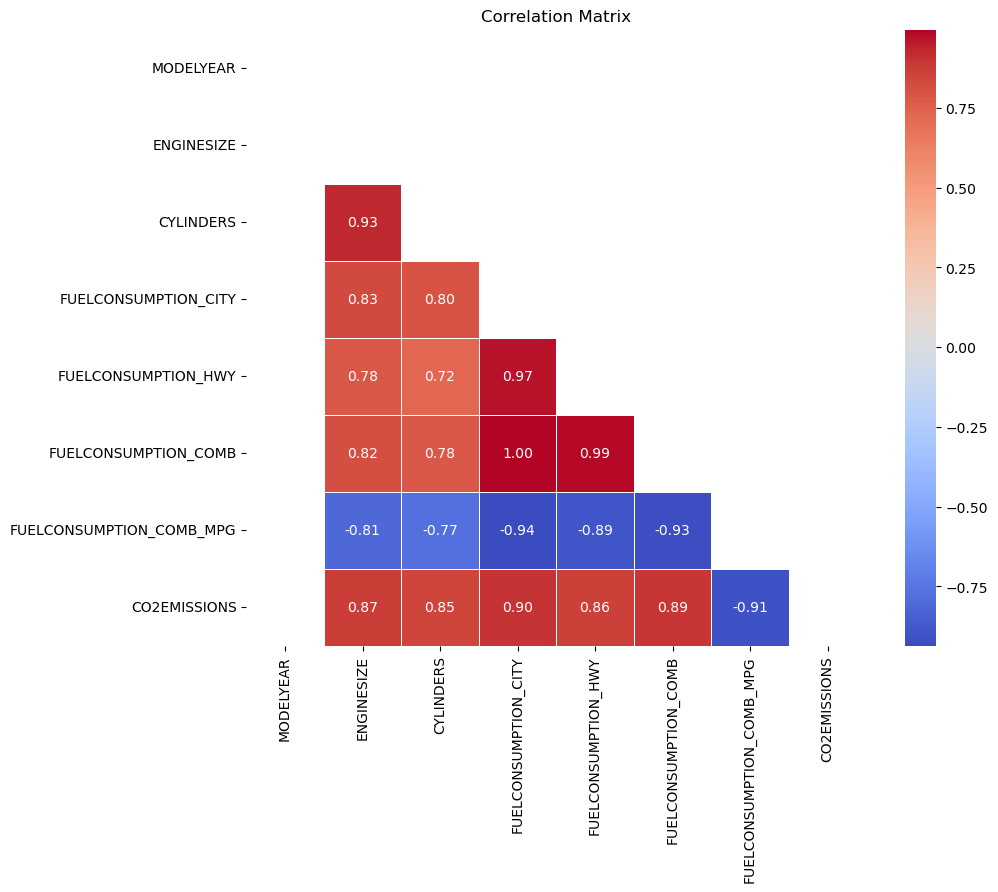

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 6 - PRE-PROCESS THE DATA

## 6.1 - Handle Missing Values


## 6.2 - Encode Categorical Variables


In [ ]:
df = pd.get_dummies(df, drop_first=True)

## 6.3 - Feature Scaling

In [ ]:
#UNDER CONSTRUCTION

# 7 - SPLIT THE DATA

## 7.1 - Separate features and target variable

In [58]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [59]:
# 2. Split features and target
X = df_encoded.drop("CO2EMISSIONS", axis=1)  # Replace with your actual target column name
y = df_encoded["CO2EMISSIONS"]

## 7.2 - Split the dataset into training and test sets

In [60]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42
)

## 7.3 - Display dimensions to verify the split

In [61]:
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training feature set shape: (853, 746)
Test feature set shape: (214, 746)
Training labels shape: (853,)
Test labels shape: (214,)


In [62]:
print(X_train.head())


     MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
333       2014         1.4          4                   8.5   
106       2014         4.4          8                  15.0   
585       2014         3.0          6                  11.2   
55        2014         3.0          6                  13.2   
213       2014         5.3          8                  18.3   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
333                  6.9                   7.8                        36   
106                  9.8                  12.7                        22   
585                  8.4                   9.9                        29   
55                   9.2                  11.4                        25   
213                 14.2                  16.5                        17   

     MAKE_ASTON MARTIN  MAKE_AUDI  MAKE_BENTLEY  ...  TRANSMISSION_AV  \
333              False      False         False  ...            False   
106              F

In [63]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')


# 8 - TRAIN A MODEL


In [64]:

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

# 9 - EVALUATE AND TUNE THE MODEL

## 9.1 - Evaluate on Test Set

In [66]:
# 7. Make predictions on the test set
y_pred = model.predict(X_test)

In [70]:
# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 104.1949154989814
R² Score: 0.9748013811635705


## 9.2 - Cross-Validation

In [71]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print('CV Accuracy:', scores.mean())

CV Accuracy: 0.9796440945667637


# 10 - INTERPRET RESULTS AND NEXT STEPS

## 10.1 - Interpret Coefficients or Feature Importance

In [72]:
print(model.coef_)

[ 2.31244410e-15  3.21242201e+00  1.07732194e+00 -3.29582135e+00
 -4.41074260e+00  1.59713170e+01 -5.03464785e+00  3.64073048e+00
  5.28167989e+00  1.30953727e+01 -4.32392872e+00 -3.43453501e+00
 -3.03325978e+00 -2.06572683e+00 -4.64610199e+00 -4.33750908e+00
  7.52279593e+00  2.00601589e+00 -3.39418874e+00  9.37916541e+00
  3.66563037e+00 -5.24695154e+00 -2.45906518e+00  7.09270847e-01
  4.75405258e-01  2.10601081e+01  3.36122880e+00 -2.72521066e+00
  9.73167948e-01  5.16568390e+00  3.64199588e+00 -2.50975813e+00
  2.04815493e+00  3.55494850e+00 -6.96754239e-01 -8.15882555e+00
 -9.39639796e+00  9.79901428e+00  4.57059547e+00  1.11157191e+01
  4.29837476e+00 -9.20909290e-01  3.69547017e+00  3.98550626e+00
 -5.22509083e+00  1.27688040e+01  1.36577926e+01  3.62532927e+00
 -3.90798505e-14  2.47862429e+00 -1.27897692e-13 -1.98593822e+00
  1.69947128e+00 -5.29154154e-01 -2.66066682e+00 -4.84629830e+00
 -3.76068589e+00 -1.75739444e-01  1.39216569e-01  4.60863764e+00
 -4.84629830e+00  1.00364

## 10.2 - Discuss Limitations and Improvements
What worked well?  
What needs improvement?  
Future work or deployment ideas